In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [21]:
df = pd.read_csv('insurance.csv')

In [22]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
df = pd.get_dummies(data=df,columns=['sex','smoker','region'], drop_first=True, prefix_sep='is_')

In [25]:
df.duplicated().sum()

1

In [26]:
df.drop_duplicates()

age     bmi  children      charges  sexis_male  smokeris_yes  \
0      19  27.900         0  16884.92400           0             1   
1      18  33.770         1   1725.55230           1             0   
2      28  33.000         3   4449.46200           1             0   
3      33  22.705         0  21984.47061           1             0   
4      32  28.880         0   3866.85520           1             0   
...   ...     ...       ...          ...         ...           ...   
1333   50  30.970         3  10600.54830           1             0   
1334   18  31.920         0   2205.98080           0             0   
1335   18  36.850         0   1629.83350           0             0   
1336   21  25.800         0   2007.94500           0             0   
1337   61  29.070         0  29141.36030           0             1   

      regionis_northwest  regionis_southeast  regionis_southwest  
0                      0                   0                   1  
1                      0                   1                   0  
2                      0                   1                   0  
3                      1                   0                   0  
4                      1                   0                   0  
...                  ...                 ...                 ...  
1333                   1                   0                   0  
1334                   0                   0                   0  
1335                   0                   1                   0  
1336                   0                   0                   1  
1337                   1                   0                   0  

[1337 rows x 9 columns]

In [27]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state= 42)

In [29]:
x_train.shape

(963, 8)

<Axes: xlabel='bmi', ylabel='charges'>

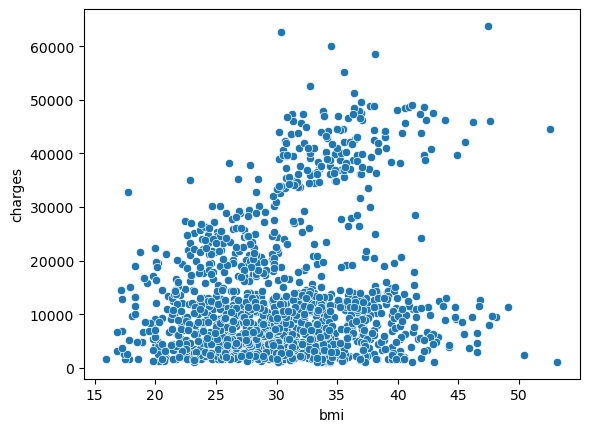

In [39]:
sns.scatterplot(data= df, x= 'bmi',y= 'charges')

<Axes: xlabel='age', ylabel='charges'>

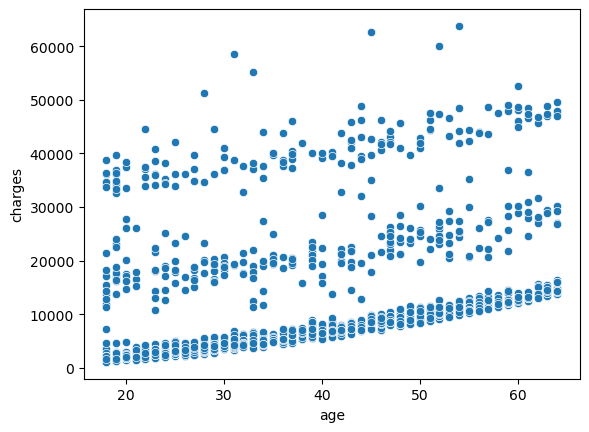

In [42]:
sns.scatterplot(data= df, x= 'age',y= 'charges')

In [59]:
x = RandomForestRegressor(n_estimators=100, random_state=42)

In [62]:
x.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [63]:
x.score(x_test,y_test)

0.8607448565966412

In [159]:
steps = [
    ('scaling', StandardScaler()),
    ('RF', RandomForestRegressor(n_estimators= 200, min_samples_leaf= 20))
]

pipeline = Pipeline(steps)

In [160]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('RF',
                 RandomForestRegressor(min_samples_leaf=20, n_estimators=200))])

In [161]:
pipeline.score(x_train, y_train)

0.8728238659498181

In [162]:
pipeline.score(x_test, y_test)

0.8733965898709177